# Overview

## MCR Dataset

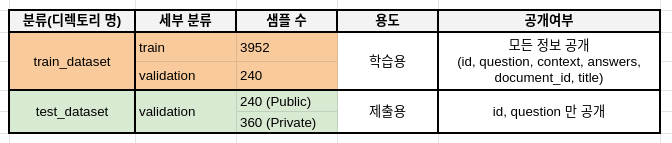
- 데이터 구조
    - id: 질문의 고유 id
    - question: 질문
    - answers: 답변에 대한 정보. 하나의 질문에 하나의 답변만 존재함
    - answer_start : 답변의 시작 위치
    - text: 답변의 텍스트
    - context: 답변이 포함된 문서
    - title: 문서의 제목
    - document_id: 문서의 고유 id

In [1]:
#import packages

from datasets import load_from_disk
import os
import json
import pandas as pd
import pprint


DATA_PATH = "../../data/"

In [2]:
!ls -al $DATA_PATH

total 455064
drwxr-xr-x 1 root root      4096 Oct 24 20:57 .
drwxr-xr-x 1 root root      4096 Oct 24 20:47 ..
-rw-r--r-- 1 root root 227645202 Oct 24 20:57 sparse_embedding.bin
drwxr-xr-x 1 root root      4096 Oct 22 08:21 test_dataset
-rw-r--r-- 1 root root  42722520 Oct 24 20:57 tfidv.bin
drwxr-xr-x 1 root root      4096 Oct  8 09:03 train_dataset
-rw-r--r-- 1 root root 115354678 Oct  8 09:03 wikipedia_documents.json
-rw-r--r-- 1 root root  80240640 Oct 14 06:25 wikipedia_documents.json.back


In [3]:
mrc_train_dataset = load_from_disk(os.path.join(DATA_PATH,"train_dataset"))
print(mrc_train_dataset)

DatasetDict({
    train: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 3952
    })
    validation: Dataset({
        features: ['__index_level_0__', 'answers', 'context', 'document_id', 'id', 'question', 'title'],
        num_rows: 240
    })
})


In [4]:
# train / validation 분리

train_dataset = mrc_train_dataset['train']
validation_dataset = mrc_train_dataset['validation']

In [5]:
train_dataset[0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [6]:
validation_dataset[0]

{'title': '전효숙',
 'context': '순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법시험에 합격하여 판사로 임용되었고 대법원 재판연구관, 수원지법 부장판사, 사법연수원 교수, 특허법원 부장판사 등을 거쳐 능력을 인정받았다. 2003년 최종영 대법원장의 지명으로 헌법재판소 재판관을 역임하였다.\\n\\n경제민주화위원회(위원장 장하성이 소액주주들을 대표해 한보철강 부실대출에 책임이 있는 이철수 전 제일은행장 등 임원 4명을 상대로 제기한 손해배상청구소송에서 서울지방법원 민사합의17부는 1998년 7월 24일에 "한보철강에 부실 대출하여 은행에 막대한 손해를 끼친 점이 인정된다"며 "원고가 배상을 청구한 400억원 전액을 은행에 배상하라"고 하면서 부실 경영인에 대한 최초의 배상 판결을 했다. \\n\\n2004년 10월 신행정수도의건설을위한특별조치법 위헌 확인 소송에서 9인의 재판관 중 유일하게 각하 견해를 내었다. 소수의견에서 전효숙 재판관은 다수견해의 문제점을 지적하면서 관습헌법 법리를 부정하였다. 전효숙 재판관은 서울대학교 근대법학교육 백주년 기념관에서 열린 강연에서, 국회가 고도의 정치적인 사안을 정치로 풀기보다는 헌법재판소에 무조건 맡겨서 해결하려는 자세는 헌법재판소에게 부담스럽다며 소회를 밝힌 바 있다.',
 'question': '처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?',
 'id': 'mrc-0-003264',
 'answers': {'answer_start': [284], 'text': ['한보철강']},
 'document_id': 9027,
 '__index_level_0__': 2146}

In [7]:
# Train 데이터 셋 중 train / validation 비율
print(f"MRC Dataset Count : {train_dataset.num_rows + validation_dataset.num_rows} ")
print(f"*"*20)
print(f"Train Dataset Count : { train_dataset.num_rows } ")
print(f"Train Dataset Ratio : { train_dataset.num_rows / (train_dataset.num_rows + validation_dataset.num_rows):.2f} ")
print(f"*"*20)
print(f"Validation Dataset Count : { validation_dataset.num_rows } ")
print(f"Validation Dataset Ratio : { validation_dataset.num_rows / (train_dataset.num_rows + validation_dataset.num_rows):.2f} ")


MRC Dataset Count : 4192 
********************
Train Dataset Count : 3952 
Train Dataset Ratio : 0.94 
********************
Validation Dataset Count : 240 
Validation Dataset Ratio : 0.06 


Train / Valid Dataset의 비율이 94:6 정도임을 보인다.  
일반적으로 Train - Valid Dataset 분할 시, 80:20 또는 70:30 비율로 나누던 것과는 차이를 보임을 알 수 있다

## Retrieval Dataset

In [8]:
with open(os.path.join(DATA_PATH, "wikipedia_documents.json"), "r", encoding="utf-8") as f:
    wiki = json.load(f)

In [9]:
wiki_dataset = pd.DataFrame(wiki)
wiki_dataset = wiki_dataset.transpose()

In [10]:
pprint.pprint(wiki_dataset.columns)
print(f"Retrieval Dataset Count : {len(wiki_dataset.index)}")

Index(['text', 'corpus_source', 'url', 'domain', 'title', 'author', 'html',
       'document_id'],
      dtype='object')
Retrieval Dataset Count : 60613


In [11]:
wiki_dataset.iloc[0].to_dict()

{'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
 'corpus_source': '위키피디아',
 'url': 'TODO',
 'domain': None,
 'title': '나라 목록',
 'author': None,
 'html': None,
 'document_id': 0}

MRC 데이터셋과는 다르게, text(Corpus) 및 Corpus에 대한 정보만 존재함을 알 수 있다.